### Plot for Jonas

pick  AeronetSun
pick  AeronetSun
pick  AeronetSDA
pick  AeronetSDA
pick  AeronetInv
pick  EBAS-Lev3
pick  EBAS-Lev3


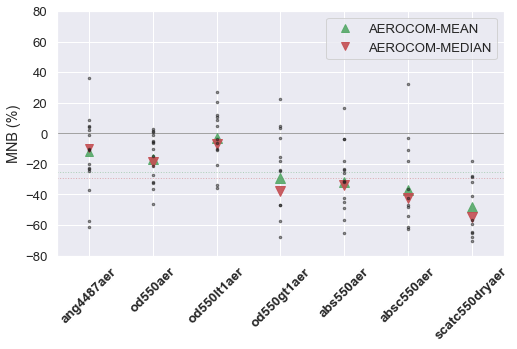

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import urllib.request, json 

# import seaborn style
sns.set()
sns.set_context("paper")
sns.color_palette("muted")
fscale = 1.2
sns.set(font_scale=fscale)

#reads json file
with urllib.request.urlopen('https://aerocom-evaluation.met.no/data_new/json/aerocom/PIII-optics2019/hm/glob_stats.json') as url:
    data = json.load(url)

#plotting
fig, ax = plt.subplots(1, 1)

means, medians = [], []
vars = list(data.keys())
for i, var in enumerate(vars):
    obss = list(data[var].keys())
    for o in obss:
        if 'Aeronet' in o or 'EBAS' in o:
            print('pick ',o)
            obs = o
    vert = list(data[var][obs].keys())[0]
    data[var][obs][vert]
    models = list(data[var][obs][vert].keys())
    stats = []
    for model in models:
        modvar = list(data[var][obs][vert][model].keys())[0]
        stat = data[var][obs][vert][model][modvar]['WORLD']['nmb']*100
        stats.append(stat)
        if model=='AEROCOM-MEAN':
            if i==0:
                plt.plot(i,stat,'^',color='g',label=model,alpha=.9, ms=8)
            else:
                plt.plot(i,stat,'^',color='g',alpha=.9, ms=10)
            means.append(stat)
        elif model=='AEROCOM-MEDIAN':
            if i==0:
                plt.plot(i,stat,'v',color='r',label=model,alpha=.9, ms=8)
            else:
                plt.plot(i,stat,'v',color='r',alpha=.9, ms=10)
            medians.append(stat)
        else:
            plt.plot(i,stat,'.',color='k',alpha=.5, ms=5)

#plot zeros axis
plt.hlines(0, xmin=-0.5, xmax=len(vars), ls='-', color='k', lw=1, alpha=.4)
#plot averages
plt.hlines(np.nanmean(means), xmin=-0.5, xmax=len(vars), ls=':', lw=1, color='g', alpha=.4)
plt.hlines(np.nanmean(medians), xmin=-0.5, xmax=len(vars), ls=':', lw=1, color='r', alpha=.4)
#adjus ticks and axis
plt.xticks(ticks=np.arange(0,len(vars)+1),labels=vars,rotation=45, fontweight='bold')
plt.ylabel('MNB (%)')
plt.ylim(-80, 80)
plt.xlim(-0.5,6.5)
#add the legend
plt.legend()
#adjust figure size
fs = .5
fig.set_size_inches(16*fs,9*fs)
plt.savefig('test.png', dpi=300, bbox_inches='tight')